In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.FiveQbStabilizerCode import FiveQbStabilizerCodeCircuit
from functions import *


Stabilizers:

$$ XZZXI $$
$$ IXZZX $$
$$ XIXZZ $$
$$ ZXIXZ $$


In [2]:
stabilizers = ['XZZXI', 'IXZZX', 'XIXZZ', 'ZXIXZ']

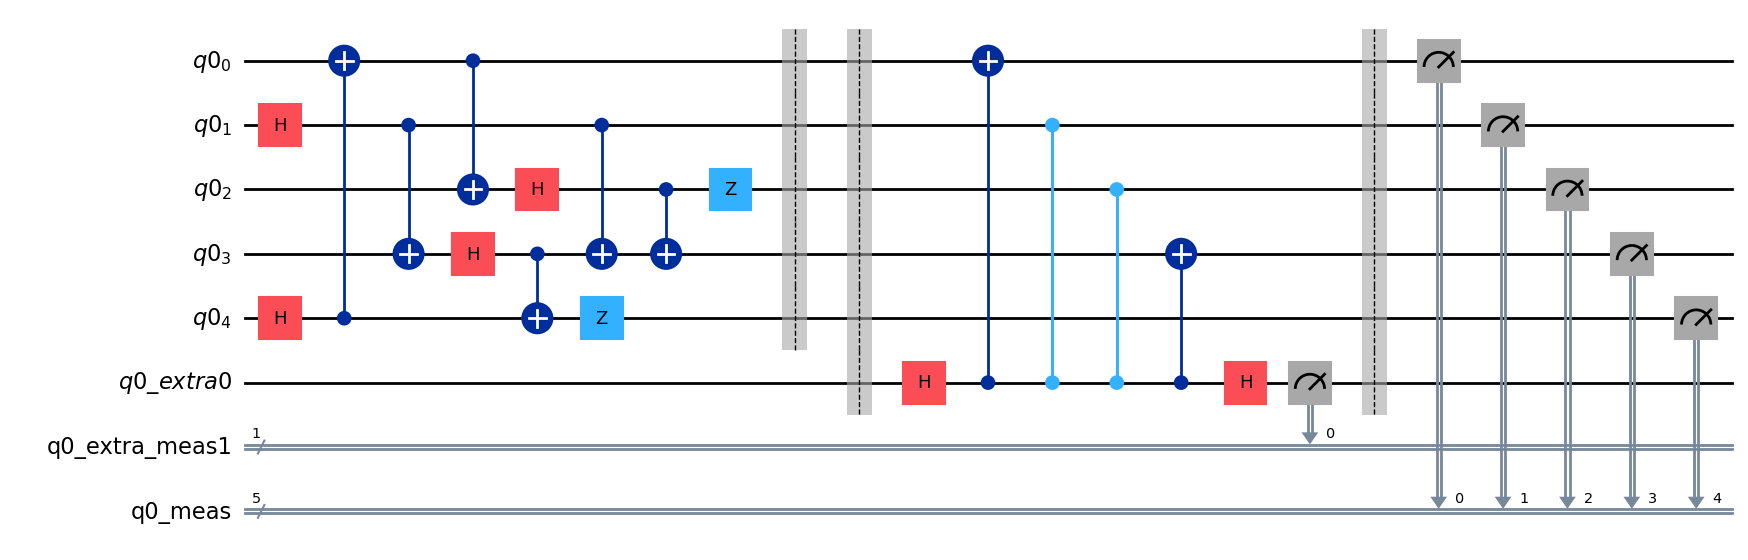

In [3]:

def load_circuit(stabilizer):

    qc = FiveQbStabilizerCodeCircuit(1)

    type = '0'
    qc.encode(type=type) # |-> logico
    
    qc.measure_operator(operator=stabilizer)
    
    # qc.spot_syndrome()
    # qc.measure_syndrome()
    qc.measure_all()

    return qc

qc = load_circuit(stabilizers[0])
qc.draw('mpl')



In [4]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_sherbrooke")

In [5]:

phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')



Circuit Depth: 15
Transpiled Circuit Depth: 83


In [6]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.222 ns


In [67]:

circuits = []


for s in stabilizers:

    qc = load_circuit(s)

    isa_circuit = get_transpile(qc.physical_circuit, backend, iterations=100)
    circuits.append(isa_circuit)

    print(f"Circuit Depth: {circuits[-1].depth()}")
    print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")
    print(get_layout(circuits[-1], qb_len=6))
    

Circuit Depth: 78
Total Duration: 14.94 us

[77, 71, 78, 76, 58, 59]


C:\Users\marzu\AppData\Local\Temp\ipykernel_41992\565232773.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 65
Total Duration: 13.17 us

[77, 71, 78, 76, 79, 58]


C:\Users\marzu\AppData\Local\Temp\ipykernel_41992\565232773.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 63
Total Duration: 12.523 us

[77, 78, 71, 76, 79, 91]


C:\Users\marzu\AppData\Local\Temp\ipykernel_41992\565232773.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 74
Total Duration: 14.94 us

[77, 78, 71, 76, 79, 91]


C:\Users\marzu\AppData\Local\Temp\ipykernel_41992\565232773.py:12: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


In [7]:
for s in stabilizers:
    simulation_result = sampler_simulation(load_circuit(s).physical_circuit, 3200)

    print(s)

    for lq in qc.qubits:

        state = lq.extra_measures[0]
        # state = lq.all_measures
        print(f"  {state.name}: {simulation_result.data[state.name].get_counts()}")

        state = lq.qb_measures
        print(f"  {state.name}: {simulation_result.data[state.name].get_counts()}")


XZZXI
  q0_extra_meas1: {'0': 3200}
  q0_meas: {'10100': 180, '00000': 203, '10001': 209, '11011': 221, '01100': 179, '11110': 185, '00110': 189, '01010': 214, '00011': 201, '00101': 201, '10111': 191, '01001': 204, '11000': 242, '11101': 215, '10010': 178, '01111': 188}
IXZZX
  q0_extra_meas1: {'0': 3200}
  q0_meas: {'11101': 194, '01111': 227, '00011': 211, '10111': 199, '01001': 197, '11110': 181, '00000': 211, '11011': 205, '10100': 199, '10001': 196, '01010': 204, '00110': 196, '11000': 204, '00101': 175, '01100': 184, '10010': 217}
XIXZZ
  q0_extra_meas1: {'0': 3200}
  q0_meas: {'11110': 198, '11101': 213, '01100': 184, '10001': 211, '11011': 210, '01001': 207, '10010': 189, '00000': 196, '10100': 213, '00110': 209, '00101': 208, '00011': 213, '11000': 183, '01010': 197, '01111': 175, '10111': 194}
ZXIXZ
  q0_extra_meas1: {'0': 3200}
  q0_meas: {'11101': 186, '10010': 223, '01010': 189, '01100': 202, '11011': 210, '01001': 191, '10111': 181, '10100': 220, '00110': 199, '01111': 2

In [8]:
sampler = SamplerV2(backend=backend)
shots = 3200

# job = sampler.run(circuits, shots=shots)
# job = service.job('cys859nr32sg008ad26g') # shots=3200, no delay
job = service.job('cytpdhpjj6dg008g2eh0') # sherbrooke


pub_result = job.result()


In [9]:
states = [bin(i)[2:].zfill(5) for i in range(2**5)]

results = []
logical_meas_results = []

for i in range(len(stabilizers)):
    result = pub_result[i]
    
    meas = result['__value__']['data']['q0_meas'].get_counts()
    res = {}
    for k in states:
        k_inv = k[::-1]
        res[k] = meas[k_inv] if k_inv in meas else 0
        res[k] = res[k] / shots * 100 # %
    results.append(res)

    logical_meas_results.append(result['__value__']['data']['q0_extra_meas1'].get_counts())



TVD (logic measurements)

In [10]:
for i in range(len(stabilizers)):
    print(stabilizers[i])
    print('\t', logical_meas_results[i])
    print(f"\tTVD: {logical_meas_results[i]['1'] / shots*100}%")

XZZXI
	 {'0': 1582, '1': 1618}
	TVD: 50.5625%
IXZZX
	 {'1': 1549, '0': 1651}
	TVD: 48.40625%
XIXZZ
	 {'1': 1487, '0': 1713}
	TVD: 46.46875%
ZXIXZ
	 {'1': 1682, '0': 1518}
	TVD: 52.5625%


TVD (final state)

In [11]:

print(f" stabilizer", *[f"{s}" for s in states], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(stabilizers)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {stabilizers[i]}\t", *[round(results[i][s]*shots/100) for s in states], sep='\t ')

 stabilizer	 00000	 00001	 00010	 00011	 00100	 00101	 00110	 00111	 01000	 01001	 01010	 01011	 01100	 01101	 01110	 01111	 10000	 10001	 10010	 10011	 10100	 10101	 10110	 10111	 11000	 11001	 11010	 11011	 11100	 11101	 11110	 11111
----------------------------------------------------------------------------------
 XZZXI		 115	 84	 98	 70	 97	 80	 162	 50	 82	 109	 67	 90	 98	 117	 70	 210	 69	 121	 69	 118	 90	 78	 52	 128	 156	 51	 148	 90	 99	 96	 170	 66
 IXZZX		 154	 75	 74	 130	 164	 74	 103	 125	 60	 134	 106	 74	 97	 102	 119	 80	 109	 46	 47	 137	 191	 77	 57	 149	 54	 120	 114	 37	 54	 135	 150	 52
 XIXZZ		 79	 80	 56	 104	 53	 162	 205	 33	 126	 58	 88	 91	 65	 183	 115	 171	 57	 134	 219	 38	 94	 46	 39	 100	 61	 207	 137	 126	 111	 56	 47	 59
 ZXIXZ		 88	 154	 86	 89	 122	 118	 55	 84	 92	 77	 90	 157	 44	 78	 139	 109	 114	 138	 87	 88	 110	 120	 71	 80	 107	 96	 71	 123	 83	 80	 115	 135


In [12]:
valid_states = [s for s in states if sum([int(i) for i in s]) % 2 == 0]

In [13]:
alpha = {}

for s in states:
    alpha[s] = 1/len(valid_states) if s in valid_states else 0


In [14]:
tvd = [sum([abs(r[s]/100 - alpha[s]) for s in states])/2 for r in results]

print("stabilizer\tTVD")
print("------------------------")
for i in range(len(stabilizers)):

    print(f"{stabilizers[i]}\t\t", round(tvd[i],3))

stabilizer	TVD
------------------------
XZZXI		 0.431
IXZZX		 0.473
XIXZZ		 0.455
ZXIXZ		 0.528
